# Imbalanced Learning

* Néstor Andrés Tabares
* Juan Diego Saldarriaga
* Juan David Lasso

Clasificación de Riesgo Crediticio La base de datos en cuestión clasifica a individuos en buenos o malos riesgos crediticios basándose en un conjunto de atributos. Se presenta en dos formatos: uno completamente numérico y otro con atributos categóricos. Además, se acompaña de una matriz

* Cuenta Corriente: Estado de la cuenta corriente
existente.
* Duración: Duración del crédito en meses.
* Historial de Crédito: Calidad del historial de crédito.
* Propósito: Propósito del crédito.
* Monto del Crédito: Cantidad de crédito solicitado.
* Ahorros: Estado de las cuentas de ahorro o bonos.
* Empleo: Duración del empleo actual.
* Tasa de Cuota: Porcentaje de la tasa de cuota en relación con los ingresos disponibles.
* Estado Personal y Sexo: Estado civil y género.
* Otros Deudores/Garantes: Existencia de otros deudores o garantes.
* Residencia Actual: Tiempo de residencia en la vivienda actual.
* Propiedad: Tipo de propiedad.
* Edad: Edad en años.
* Otros Planes de Pago: Existencia de otros planes de pago.
* Vivienda: Tipo de vivienda.
* Créditos Existentes: Número de créditos existentes en el banco.
* Trabajo: Tipo de empleo.
* Dependientes: Número de personas dependientes.
* Teléfono: Si tiene teléfono registrado a su nombre.
* Trabajador Extranjero: Si es trabajador extranjero.

- **Estado de la Cuenta Corriente**:
  - A11: ... < 0 DM
  - A12: 0 <= ... < 200 DM
  - A13: ... >= 200 DM / asignaciones salariales por al menos 1 año
  - A14: sin cuenta corriente

- **Historial de Crédito**:
  - A30: no se han tomado créditos/todos los créditos devueltos debidamente
  - A31: todos los créditos en este banco devueltos debidamente
  - A32: créditos existentes devueltos debidamente hasta ahora
  - A33: retraso en el pago en el pasado
  - A34: cuenta crítica/otros créditos existentes (no en este banco)

- **Propósito del Crédito**:
  - A40: coche (nuevo)
  - A41: coche (usado)
  - A42: muebles/equipamiento
  - A43: radio/televisión
  - A44: electrodomésticos
  - A45: reparaciones
  - A46: educación
  - A47: (vacaciones - no existe?)
  - A48: reciclaje profesional
  - A49: negocio
  - A410: otros

- **Cuenta de Ahorros/Bonos**:
  - A61: ... < 100 DM
  - A62: 100 <= ... < 500 DM
  - A63: 500 <= ... < 1000 DM
  - A64: ... >= 1000 DM
  - A65: desconocido/sin cuenta de ahorros

- **Empleo Actual**:
  - A71: desempleado
  - A72: ... < 1 año
  - A73: 1 <= ... < 4 años
  - A74: 4 <= ... < 7 años
  - A75: ... >= 7 años

- **Tasa de Cuota en Porcentaje del Ingreso Disponible**

- **Estado Personal y Sexo**:
  - A91: masculino: divorciado/separado
  - A92: femenino: divorciado/separado/casado
  - A93: masculino: soltero
  - A94: masculino: casado/viudo
  - A95: femenino: soltera

- **Otros Deudores/Garantes**:
  - A101: ninguno
  - A102: co-deudor
  - A103: garante

- **Propiedad**:
  - A121: bienes raíces
  - A122: si no A121: acuerdo de ahorro para la construcción/seguro de vida
  - A123: si no A121/A122: coche u otro, no en el atributo 6
  - A124: desconocido/sin propiedad


- **Otros Planes de Cuotas**:
  - A141: banco
  - A142: tiendas
  - A143: ninguno

- **Vivienda**:
  - A151: alquiler
  - A152: propia
  - A153: gratis

- **Empleo**:
  - A171: desempleado/no cualificado - no residente
  - A172: no cualificado - residente
  - A173: empleado cualificado/oficial
  - A174: gerencia/autónomo/muy cualificado/empleado oficial

- **Teléfono**:
  - A191: ninguno
  - A192: sí, registrado a nombre del cliente

- **Trabajador Extranjero**:
  - A201: sí
  - A202: no

## Manejo de clases desbalanceadas con la librería Python ImbLearn

## Importar base de datos

In [54]:
pip install ucimlrepo

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

In [56]:
from ucimlrepo import fetch_ucirepo

statlog_german_credit_data = fetch_ucirepo(id=144)

X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

print(statlog_german_credit_data.metadata)

print(statlog_german_credit_data.variables)



{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

## Creación de la base de datos

In [57]:

df = pd.concat([X, y], axis=1)
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Modificar las variables y mirar datos nulos

In [58]:
df['class'] = df['class'].replace({1: 0, 2: 1})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  



*   Se evidencia que no existen datos nulos , la base de datos esta completa



In [59]:
df["class"].unique()

array([0, 1])

In [60]:
df.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'class'],
      dtype='object')

In [61]:
columnas_categoricas = ['Attribute1', 'Attribute3','Attribute4','Attribute6','Attribute7','Attribute9',
                        'Attribute10','Attribute12','Attribute14','Attribute15','Attribute17','Attribute19','Attribute20',]

for columna in columnas_categoricas:
    df[columna] = df[columna].str.replace('A', '').astype('int64')

df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,11,6,34,43,1169,65,75,4,93,101,...,121,67,143,152,2,173,1,192,201,0
1,12,48,32,43,5951,61,73,2,92,101,...,121,22,143,152,1,173,1,191,201,1
2,14,12,34,46,2096,61,74,2,93,101,...,121,49,143,152,1,172,2,191,201,0
3,11,42,32,42,7882,61,74,2,93,103,...,122,45,143,153,1,173,2,191,201,0
4,11,24,33,40,4870,61,73,3,93,101,...,124,53,143,153,2,173,2,191,201,1


In [62]:
for columna in columnas_categoricas:
    codificacion = {valor: codigo for codigo, valor in enumerate(sorted(df[columna].unique()))}
    df[columna] = df[columna].map(codificacion)

In [63]:
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,0,6,4,3,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,3,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,6,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,2,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1


## Análisis exploratorio, para comprobar el desequilibrio entre las clases

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek


from collections import Counter

%matplotlib inline

In [65]:
df.shape

(1000, 21)

In [66]:
pd.value_counts(df['class'], sort = True) #class comparison 1=good 2=bad

class
0    700
1    300
Name: count, dtype: int64

# Desbalanceo de los datos

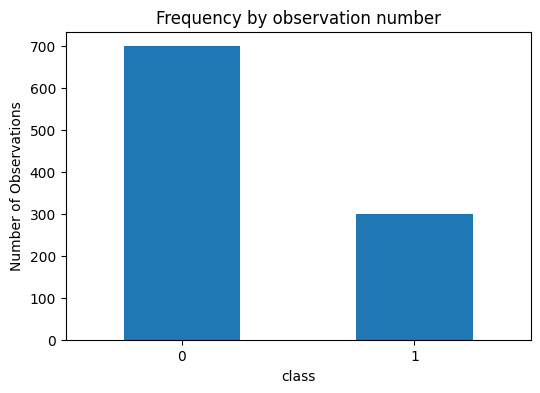

In [67]:

plt.figure(figsize=(6, 4))
count_classes = pd.value_counts(df['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("class")
plt.ylabel("Number of Observations");

Observamos que existe un desbalance en nuestra clase representada en una distribución del 70% - 30%

In [68]:
print(df.groupby('class').size())

class
0    700
1    300
dtype: int64



¿Llegas a ver la mínima linea azul que representa los casos de bade? son muy pocas muestras!

In [69]:
good_df = df[df['class'] == 0]
bad_df = df[df['class'] == 1]

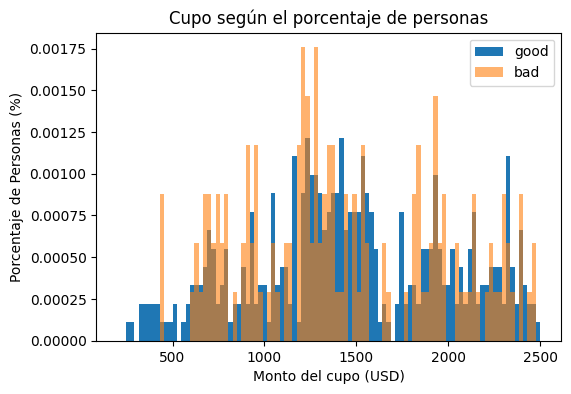

In [70]:

plt.figure(figsize=(6, 4))
bins = np.linspace(200, 2500, 100)
plt.hist(good_df.Attribute5, bins, alpha=1, density=True, label='good')
plt.hist(bad_df.Attribute5, bins, alpha=0.6, density=True, label='bad')
plt.legend(loc='upper right')
plt.title("Cupo según el porcentaje de personas")
plt.xlabel("Monto del cupo (USD)")
plt.ylabel("Porcentaje de Personas (%)")
plt.show()

## Probando estrategias: Modelo con los datos desbalanceados

In [71]:
y = df['class']
X = df.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

In [72]:
y = df['class']
X = df.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)

In [73]:

def run_modelL2(X_train, X_test, y_train, y_test,c):
    clf_base = LogisticRegression(C= 10**c,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

In [74]:

def run_modelL1(X_train, X_test, y_train, y_test,c):
    clf_base = LogisticRegression(C=10**c,penalty='l1',random_state=1,solver="liblinear")
    clf_base.fit(X_train, y_train)
    return clf_base

# Estandarizar la varaibles

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modelo sin balancear con L2

In [76]:
from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_precision1 = 0
mejor_recall1 = 0

for c in range(-5, 5):
    modelL2 = run_modelL2(X_train_scaled, X_test_scaled, y_train, y_test, c)
    y_pred = modelL2.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    promedio = (precision + recall) / 2

    if promedio > mejor_promedio:
        mejor_promedio = promedio
        mejor_c = c
        mejor_precision1 = precision
        mejor_recall1 = recall
        modelL2R = modelL2

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}")
print(f"Precision: {mejor_precision1:.4f}, Recall: {mejor_recall1:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mejor promedio: 0.5661 para c = 0
Precision: 0.5974, Recall: 0.5349


In [77]:


def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [78]:
pred_y = modelL2R.predict(X_test_scaled)
confusion_matrix(y_test, pred_y)

array([[183,  31],
       [ 40,  46]])

<Figure size 600x400 with 0 Axes>

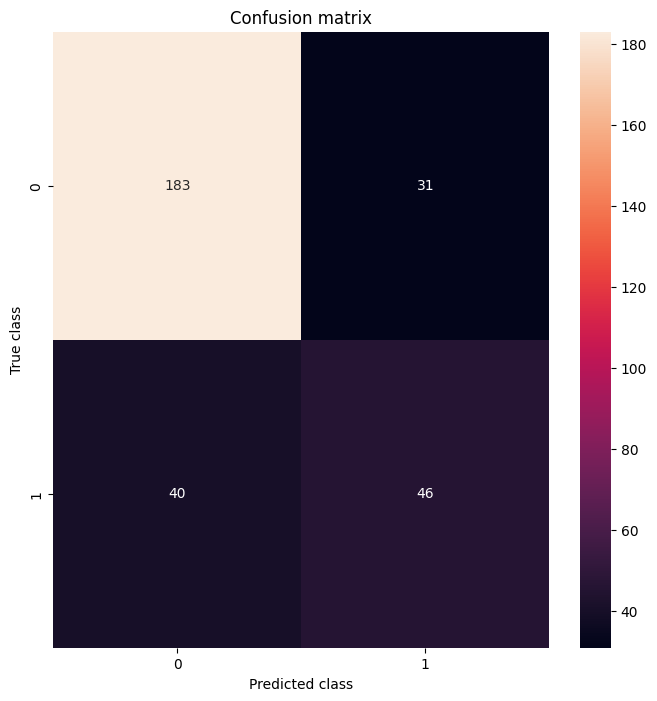

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [79]:
plt.figure(figsize=(6, 4))
pred_y = modelL2R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

Aqui vemos la confusion matrix y en la clase 2 (es lo que nos interesa detectar) vemos 57 fallos y 90 aciertos dando un recall de 0.61 (segunda clase) y es el valor que queremos mejorar. También es interesante notar que en la columna de f1-score obtenemos muy buenos resultados PERO que realmente no nos deben engañar… pues están reflejando una realidad parcial. Lo cierto es que nuestro modelo no es capaz de detectar correctamente los casos de bade.

# Modelo sin baleancear L1

In [80]:
from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_precision2 = 0
mejor_recall2 = 0

for c in range(-5, 5):
    modelL1 = run_modelL1(X_train_scaled, X_test_scaled, y_train, y_test, c)
    y_pred = modelL1.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    promedio = (precision + recall) / 2

    if promedio > mejor_promedio:
        mejor_promedio = promedio
        mejor_c = c
        mejor_precision2 = precision
        mejor_recall2 = recall
        modelL1R = modelL1

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}")
print(f"Precision: {mejor_precision2:.4f}, Recall: {mejor_recall2:.4f}")


Mejor promedio: 0.5661 para c = 0
Precision: 0.5974, Recall: 0.5349


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [81]:
pred_y = modelL1R.predict(X_test_scaled)
confusion_matrix(y_test, pred_y)

array([[183,  31],
       [ 40,  46]])

<Figure size 600x400 with 0 Axes>

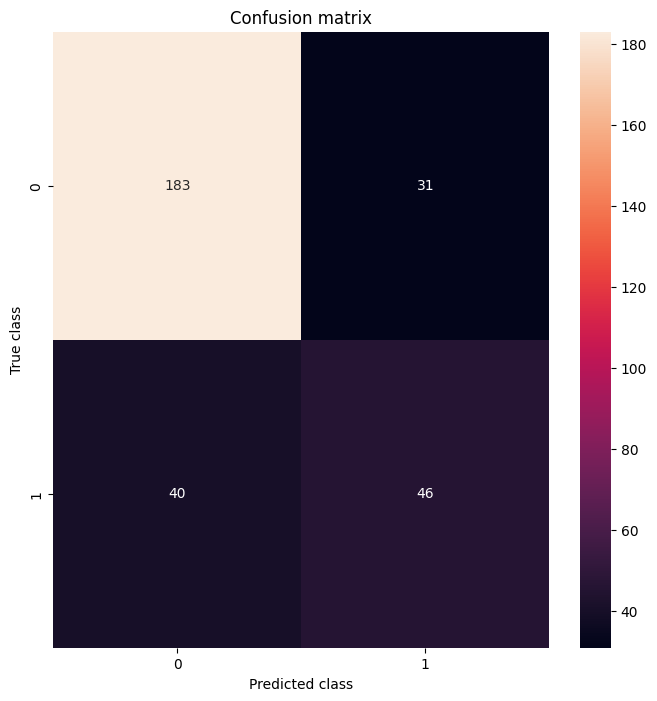

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [82]:
plt.figure(figsize=(6, 4))
pred_y = modelL1R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

# Penalización con L2

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos `weight` = `balanced` y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento. Veamos:

In [83]:
def run_model_balancedL2(X_train, X_test, y_train, y_test, c):
    clf = LogisticRegression(C=10**c,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_precision3 = 0
mejor_recall3 = 0

for c in range(-5, 5):
    model = run_model_balancedL2(X_train_scaled, X_test_scaled, y_train, y_test, c)
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    promedio = (precision + recall) / 2

    if promedio > mejor_promedio:
        mejor_promedio = promedio
        mejor_c = c
        mejor_precision3 = precision
        mejor_recall3 = recall
        run_model_balancedL2R = model

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}")
print(f"Precision: {mejor_precision3:.4f}, Recall: {mejor_recall3:.4f}")



Mejor promedio: 0.6302 para c = -5
Precision: 0.5161, Recall: 0.7442


<Figure size 500x400 with 0 Axes>

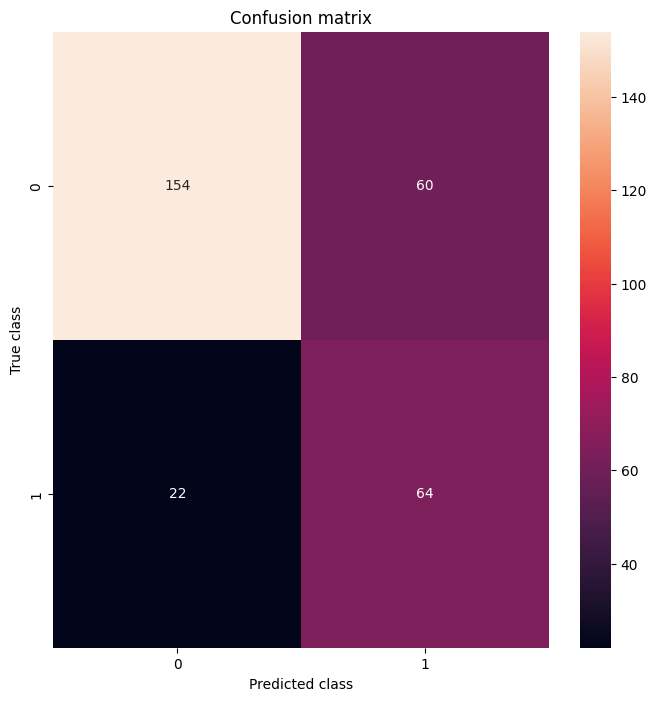

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       214
           1       0.52      0.74      0.61        86

    accuracy                           0.73       300
   macro avg       0.70      0.73      0.70       300
weighted avg       0.77      0.73      0.74       300



In [84]:
plt.figure(figsize=(5, 4))
pred_y = run_model_balancedL2R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

# Penalización con L1

In [85]:
def run_model_balancedL1(X_train, X_test, y_train, y_test, c):
    clf = LogisticRegression(C=10**c,penalty='l1',random_state=1,solver="liblinear",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf
from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_precision4 = 0
mejor_recall4 = 0

for c in range(-5, 5):
    model = run_model_balancedL1(X_train_scaled, X_test_scaled, y_train, y_test, c)
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    promedio = (precision + recall) / 2

    if promedio > mejor_promedio:
        mejor_promedio = promedio
        mejor_c = c
        mejor_precision4 = precision
        mejor_recall4 = recall
        run_model_balancedL1R = model

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}")
print(f"Precision: {mejor_precision4:.4f}, Recall: {mejor_recall4:.4f}")



Mejor promedio: 0.6078 para c = -2
Precision: 0.4250, Recall: 0.7907


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 500x400 with 0 Axes>

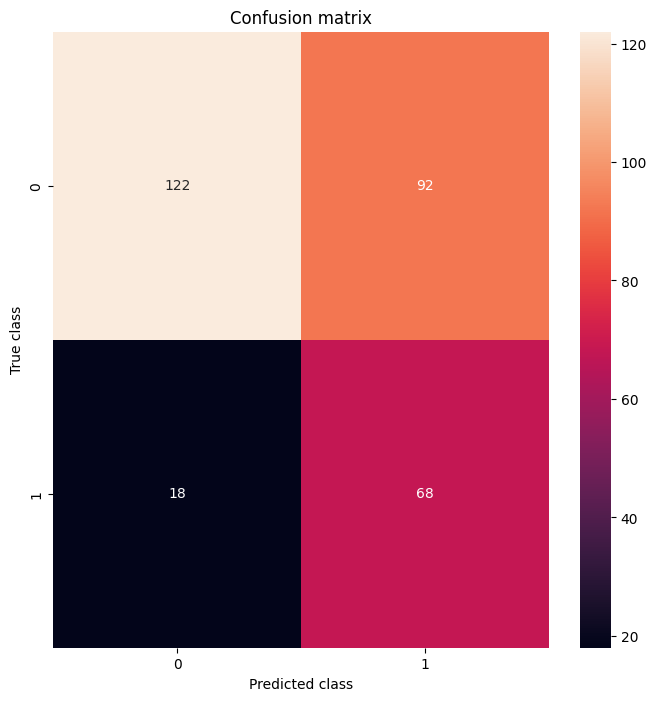

              precision    recall  f1-score   support

           0       0.87      0.57      0.69       214
           1       0.42      0.79      0.55        86

    accuracy                           0.63       300
   macro avg       0.65      0.68      0.62       300
weighted avg       0.74      0.63      0.65       300



In [86]:
plt.figure(figsize=(5, 4))
pred_y = run_model_balancedL1R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

# NearMiss subsampling del grupo mayoritario L2



In [87]:
pip install -U imbalanced-learn

In [36]:
from imblearn.under_sampling import NearMiss


In [37]:
import imblearn
print(imblearn.__version__)


0.10.1


In [38]:
from itertools import product

from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score



mejor_promedio = 0
mejor_c = None
mejor_s = None
mejor_n = None
mejor_precision5 = 0
mejor_recall5 = 0
dis = 0
i=0
s_range = range(1, 10)
n_values = [1, 10, 2]
c_range = range(-5, 5)
param_combinations = list(product(s_range, n_values, c_range))

for s, n, c in param_combinations:
      us = NearMiss(sampling_strategy=s/10, n_neighbors= n , version=2)
      try:
        X_train_res, y_train_res = us.fit_resample(X_train_scaled, y_train)
        model = run_modelL2(X_train_res, X_test_scaled, y_train_res, y_test,c)
        y_pred = model.predict(X_test_scaled)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        promedio = (precision + recall) / 2
        i=i+1


        if promedio > mejor_promedio:
          mejor_promedio = promedio
          mejor_c = c
          mejor_s = s
          mejor_n = n
          mejor_precision5 = precision
          mejor_recall5 = recall
          run_modelL2R = model
          dis = Counter(y_train_res)
      except ValueError:
        continue

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}, para s = {mejor_s/10:.2f} y para mejor n = {mejor_n}")
print(f"Precision: {mejor_precision5:.4f}, Recall: {mejor_recall5:.4f}")
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(dis))
print(i)




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Mejor promedio: 0.5945 para c = -1, para s = 0.90 y para mejor n = 10
Precision: 0.4565, Recall: 0.7326
Distribution of class labels before resampling Counter({0: 486, 1: 214})
Distribution of class labels after resampling Counter({0: 237, 1: 214})
150


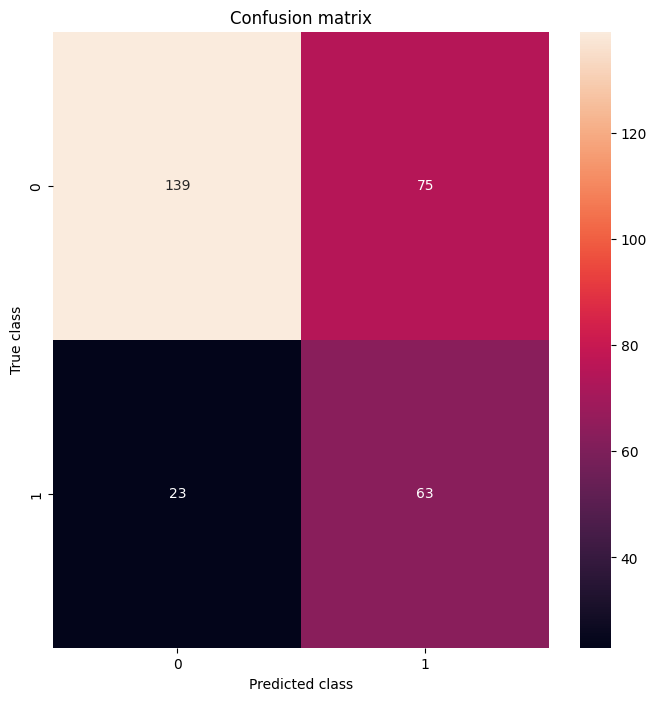

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       214
           1       0.46      0.73      0.56        86

    accuracy                           0.67       300
   macro avg       0.66      0.69      0.65       300
weighted avg       0.74      0.67      0.69       300



In [39]:
pred_y = run_modelL2R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

#NearMiss subsampling del grupo mayoritario L1


In [40]:
from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_s = None
mejor_n = None
mejor_precision6 = 0
mejor_recall6 = 0
dis = 0
i = i+1
s_range = range(1, 10)
n_values = [1, 10, 2]
c_range = range(-5, 5)
param_combinations = list(product(s_range, n_values, c_range))

for s, n, c in param_combinations:
      us = NearMiss(sampling_strategy=s/10, n_neighbors= n , version=2)
      try:
        X_train_res, y_train_res = us.fit_resample(X_train_scaled, y_train)
        model = run_modelL1(X_train_res, X_test_scaled, y_train_res, y_test,c)
        y_pred = model.predict(X_test_scaled)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        promedio = (precision + recall) / 2

        if promedio > mejor_promedio:
          mejor_promedio = promedio
          mejor_c = c
          mejor_s = s
          mejor_n = n
          mejor_precision6 = precision
          mejor_recall6 = recall
          run_modelL1R = model
          dis = Counter(y_train_res)
      except ValueError:
        continue

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}, para s = {mejor_s/10:.2f} y para mejor n = {mejor_n}")
print(f"Precision: {mejor_precision6:.4f}, Recall: {mejor_recall6:.4f}")
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(dis))
print(i)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Mejor promedio: 0.6078 para c = -2, para s = 0.60 y para mejor n = 1
Precision: 0.4250, Recall: 0.7907
Distribution of class labels before resampling Counter({0: 486, 1: 214})
Distribution of class labels after resampling Counter({0: 356, 1: 214})
151


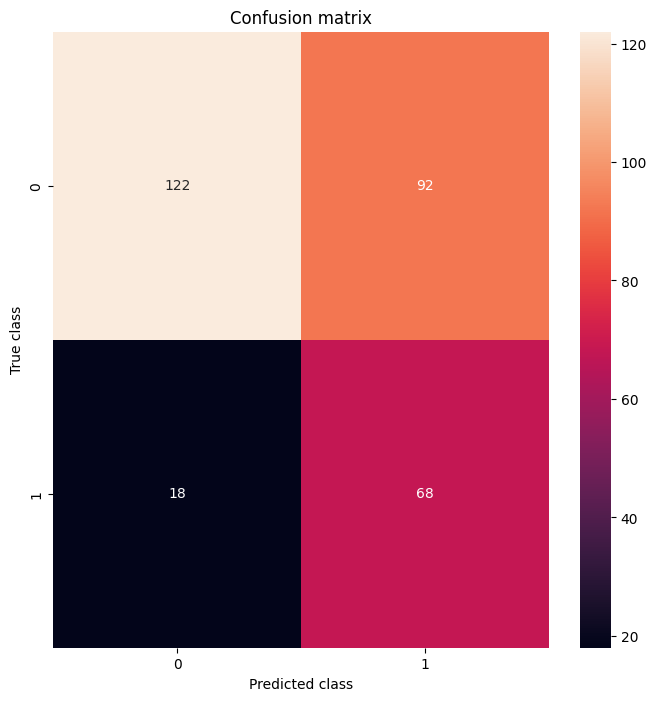

              precision    recall  f1-score   support

           0       0.87      0.57      0.69       214
           1       0.42      0.79      0.55        86

    accuracy                           0.63       300
   macro avg       0.65      0.68      0.62       300
weighted avg       0.74      0.63      0.65       300



In [41]:
pred_y = run_modelL1R.predict(X_test_scaled)

mostrar_resultados(y_test, pred_y)

#Random Oversampling L2



In [42]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NearMiss

from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_s = None
mejor_precision7 = 0
mejor_recall7 = 0
dis = 0
i=i+1
s_range = range(1, 10)
c_range = range(-5, 5)
param_combinations = list(product(s_range, c_range))

for s, c in param_combinations:
      os = RandomOverSampler(sampling_strategy= s )
      try:
        X_train_res, y_train_res = os.fit_resample(X_train, y_train)
        model = run_modelL2(X_train_res, X_test_scaled, y_train_res, y_test,c)
        y_pred = model.predict(X_test_scaled)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        promedio = (precision + recall) / 2
        i=i+1

        if promedio > mejor_promedio:
          mejor_promedio = promedio
          mejor_c = c
          mejor_s = s
          mejor_precision7 = precision
          mejor_recall7 = recall
          run_modelL2R = model
          dis = Counter(y_train_res)
      except ValueError:
        continue

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}, para s = {mejor_s/10:.2f}")
print(f"Precision: {mejor_precision7:.4f}, Recall: {mejor_recall7:.4f}")
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(dis))
print(i)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

Mejor promedio: 0.6593 para c = -3, para s = 0.10
Precision: 0.3767, Recall: 0.9419
Distribution of class labels before resampling Counter({0: 486, 1: 214})
Distribution of class labels after resampling Counter({1: 486, 0: 486})
162


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


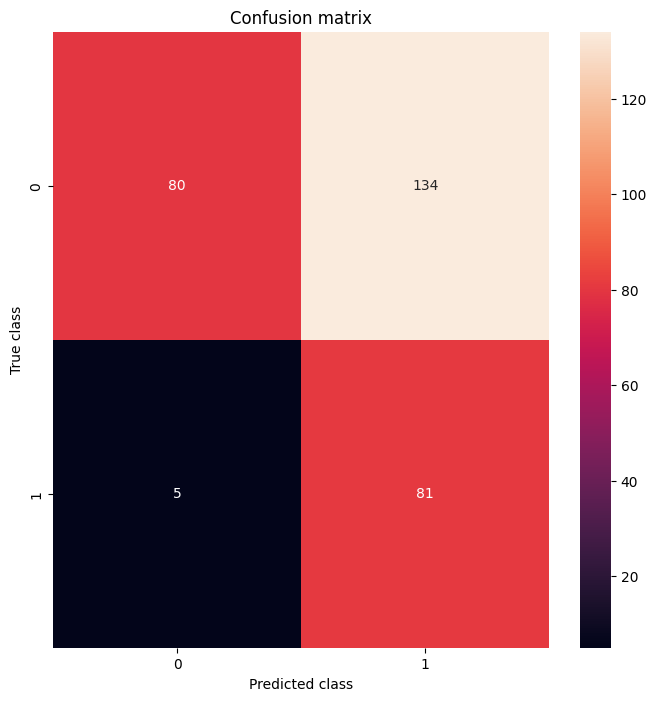

              precision    recall  f1-score   support

           0       0.94      0.37      0.54       214
           1       0.38      0.94      0.54        86

    accuracy                           0.54       300
   macro avg       0.66      0.66      0.54       300
weighted avg       0.78      0.54      0.54       300



In [43]:
pred_y = run_modelL2R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

#Random Oversampling L1

In [44]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NearMiss

from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_s = None
mejor_precision8 = 0
mejor_recall8 = 0
dis = 0
i=i+1
s_range = range(1, 10)
c_range = range(-5, 5)
param_combinations = list(product(s_range, c_range))

for s, c in param_combinations:
      os = RandomOverSampler(sampling_strategy= s )
      try:
        X_train_res, y_train_res = os.fit_resample(X_train, y_train)
        model = run_modelL1(X_train_res, X_test_scaled, y_train_res, y_test,c)
        y_pred = model.predict(X_test_scaled)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        promedio = (precision + recall) / 2
        i=i+1

        if promedio > mejor_promedio:
          mejor_promedio = promedio
          mejor_c = c
          mejor_s = s
          mejor_precision8 = precision
          mejor_recall8 = recall
          run_modelL1R = model
          dis = Counter(y_train_res)
      except ValueError:
        continue

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}, para s = {mejor_s/10:.2f}")
print(f"Precision: {mejor_precision8:.4f}, Recall: {mejor_recall8:.4f}")
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(dis))
print(i)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

Mejor promedio: 0.6323 para c = 3, para s = 0.10
Precision: 0.3227, Recall: 0.9419
Distribution of class labels before resampling Counter({0: 486, 1: 214})
Distribution of class labels after resampling Counter({1: 486, 0: 486})
173


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


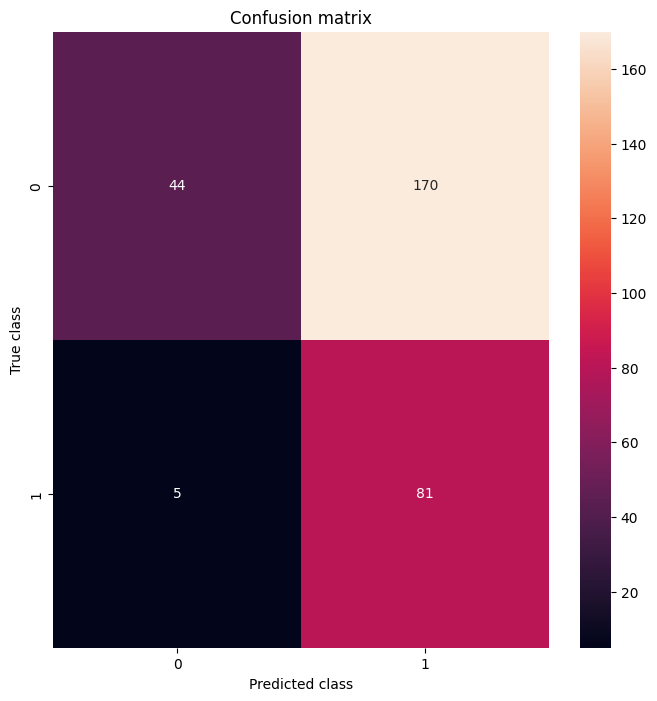

              precision    recall  f1-score   support

           0       0.90      0.21      0.33       214
           1       0.32      0.94      0.48        86

    accuracy                           0.42       300
   macro avg       0.61      0.57      0.41       300
weighted avg       0.73      0.42      0.38       300



In [45]:
pred_y = run_modelL1R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

#Combinando Smote tomek L2

In [46]:
from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_s = None
mejor_precision9 = 0
mejor_recall9 = 0
dis = 0
i=i+1
s_range = range(1, 10)
c_range = range(-5, 5)
param_combinations = list(product(s_range, c_range))
for s, c in param_combinations:
      os_us = SMOTETomek(sampling_strategy=s)
      try:
        X_train_res, y_train_res = os_us.fit_resample(X_train_scaled, y_train)
        model = run_modelL2(X_train_res, X_test_scaled, y_train_res, y_test,c)
        y_pred = model.predict(X_test_scaled)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        promedio = (precision + recall) / 2

        if promedio > mejor_promedio:
          mejor_promedio = promedio
          mejor_c = c
          mejor_s = s
          mejor_precision9 = precision
          mejor_recall9 = recall
          run_modelL2R = model
          dis = Counter(y_train_res)
      except ValueError:
        continue

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}, para s = {mejor_s/10:.2f}")
print(f"Precision: {mejor_precision9:.4f}, Recall: {mejor_recall9:.4f}")
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(dis))



Mejor promedio: 0.6153 para c = -2, para s = 0.10
Precision: 0.5214, Recall: 0.7093
Distribution of class labels before resampling Counter({0: 486, 1: 214})
Distribution of class labels after resampling Counter({1: 480, 0: 480})


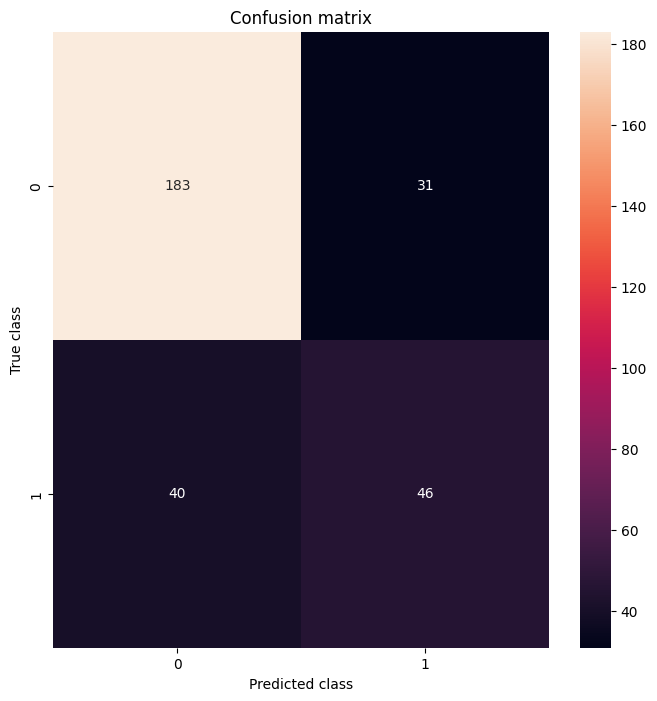

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [47]:
pred_y = modelL2R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

#Combinando Smote tomek L1

In [48]:
from sklearn.metrics import precision_score, recall_score

mejor_promedio = 0
mejor_c = None
mejor_s = None
mejor_precision10 = 0
mejor_recall10 = 0
dis = 0
i=i+1
s_range = range(1, 10)
c_range = range(-5, 5)
param_combinations = list(product(s_range, c_range))
for s, c in param_combinations:

      os_us = SMOTETomek(sampling_strategy=s)
      try:
        X_train_res, y_train_res = os_us.fit_resample(X_train_scaled, y_train)
        model = run_modelL1(X_train_res, X_test_scaled, y_train_res, y_test,c)
        y_pred = model.predict(X_test_scaled)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        promedio = (precision + recall) / 2

        if promedio > mejor_promedio:
          mejor_promedio = promedio
          mejor_c = c
          mejor_s = s
          mejor_precision10 = precision
          mejor_recall10 = recall
          run_modelL1R = model
          dis = Counter(y_train_res)
      except ValueError:
        continue

print(f"Mejor promedio: {mejor_promedio:.4f} para c = {mejor_c}, para s = {mejor_s/10:.2f}")
print(f"Precision: {mejor_precision10:.4f}, Recall: {mejor_recall10:.4f}")
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(dis))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mejor promedio: 0.6153 para c = 3, para s = 0.10
Precision: 0.5214, Recall: 0.7093
Distribution of class labels before resampling Counter({0: 486, 1: 214})
Distribution of class labels after resampling Counter({1: 477, 0: 477})


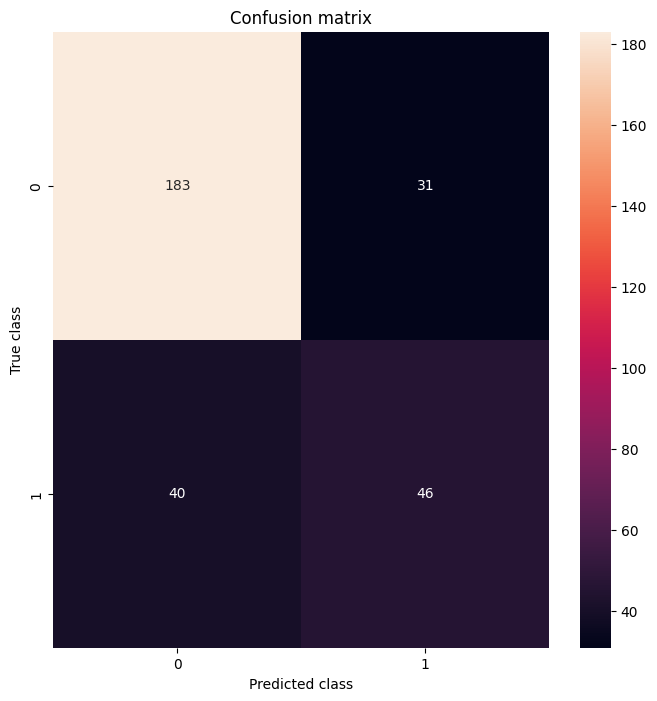

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [49]:
pred_y = modelL1R.predict(X_test_scaled)
mostrar_resultados(y_test, pred_y)

#Arbol de decisión

In [50]:
from sklearn.tree import DecisionTreeClassifier
mejor_promedio = 0
mejor_md = None
mejor_precision10 = 0
mejor_recall10 = 0

for md in range(1,10):
  dt_classifier = DecisionTreeClassifier(max_depth=md)

  dt_classifier.fit(X_train_scaled, y_train)

  y_pred = dt_classifier.predict(X_test_scaled)

  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  promedio = (precision + recall) / 2

  if promedio > mejor_promedio:
          mejor_promedio = promedio
          mejor_md = md
          mejor_precision12 = precision
          mejor_recall12 = recall
          run_modeltree = dt_classifier


print(f"Decision Tree - Precision: {mejor_precision12:.4f}, Recall: {mejor_recall12:.4f}, max depth {mejor_md}")


Decision Tree - Precision: 0.5500, Recall: 0.5116, max depth 3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Ensamble de Modelos con Balanceo

In [51]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

bbc.fit(X_train_scaled, y_train)

from sklearn.metrics import precision_score, recall_score

y_pred = bbc.predict(X_test_scaled)
mejor_precision11 = precision_score(y_test, y_pred)
mejor_recall11 = recall_score(y_test, y_pred)
promedio = (mejor_precision11 + mejor_recall11) / 2

print(f"Promedio: {promedio:.4f}")
print(f"Precision: {mejor_precision11:.4f}, Recall: {mejor_recall11:.4f}")


Promedio: 0.5842
Precision: 0.5288, Recall: 0.6395


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BalancedBaggingClassifier was fitted without feature names
  warnings.warn(


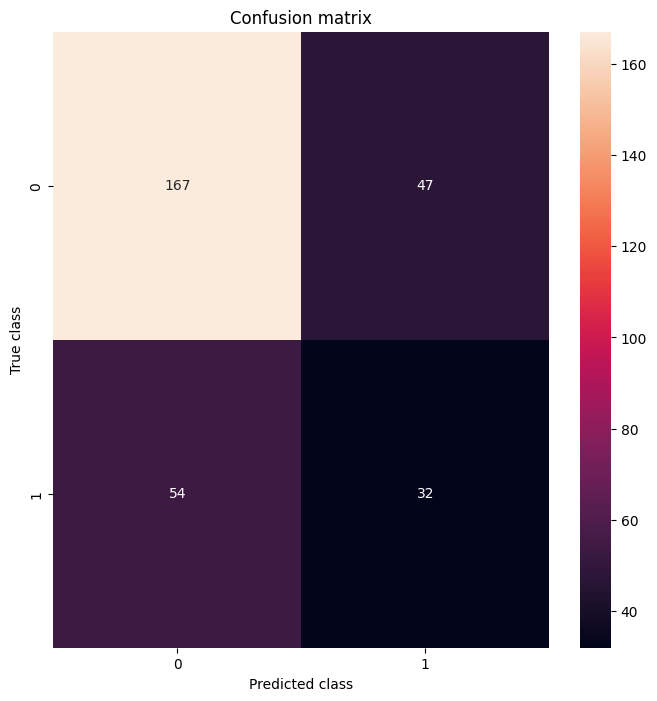

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       214
           1       0.41      0.37      0.39        86

    accuracy                           0.66       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.66      0.66      0.66       300



In [52]:
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)



# Resultados

In [53]:
df = pd.DataFrame({'algorithm' : ['Regresion Logística L2','Regresion Logística L1', 'Penalizacion L2', 'Penalizacion L1' ,'NearMiss Subsampling L2',
                                  'NearMiss Subsampling L1','Random Oversampling L2', 'Random Oversampling L1', 'Smote Tomek L2','Smote Tomek L1', 'Ensemble',"ARoboles de decisión"],
                   'precision' : [mejor_precision1 ,mejor_precision2,mejor_precision3, mejor_precision4,mejor_precision5, mejor_precision6,
                                  mejor_precision7, mejor_precision8 ,mejor_precision9,mejor_precision10,mejor_precision11,mejor_precision12],
                   'recall' : [mejor_recall1 ,mejor_recall2,mejor_recall3,mejor_recall4, mejor_recall5,mejor_recall6,
                               mejor_recall7, mejor_recall8,mejor_recall9,mejor_recall10,mejor_recall11,mejor_recall12]})

df['overall'] = df.apply(lambda row: (row.precision + row.recall)/2, axis=1)

df = df.sort_values(['overall'], ascending=False)
df

,algorithm,precision,recall,overall
6,Random Oversampling L2,0.376744,0.941860,0.659302
7,Random Oversampling L1,0.322709,0.941860,0.632285
2,Penalizacion L2,0.516129,0.744186,0.630158
8,Smote Tomek L2,0.521368,0.709302,0.615335
3,Penalizacion L1,0.425000,0.790698,0.607849
5,NearMiss Subsampling L1,0.425000,0.790698,0.607849
4,NearMiss Subsampling L2,0.456522,0.732558,0.594540
10,Ensemble,0.528846,0.639535,0.584191
0,Regresion Logística L2,0.597403,0.534884,0.566143
1,Regresion Logística L1,0.597403,0.534884,0.566143


Vemos que en nuestro caso las estrategias de Oversampling y Regresión Logística con una penalización L2 nos dan el mejor resultado, cada una con un overall de 0.66 y 0.63.


# **Conclusiones**
* La base de datos de crédito alemana presenta un desbalance significativo entre las clases, con un 70% de casos de buen riesgo crediticio y un 30% de mal riesgo crediticio.

* Los modelos de regresión logística sin balancear las clases tuvieron un desempeño deficiente en la detección de los casos de mal riesgo crediticio, con un recall bajo para esa clase.

La aplicación de técnicas de balanceo de clases mejoró el desempeño del modelo en la detección de casos de mal riesgo crediticio:

* Las estrategias de oversampling Random Oversampling con regresión logística L2 y L1 obtuvieron los mejores puntajes generales (0.66 y 0.63 respectivamente).
* La penalización L2 con balanceo de clases también tuvo un buen desempeño (puntaje general de 0.63).
* Las técnicas SMOTE Tomek y NearMiss Subsampling con regresión logística también mejoraron el recall para la clase minoritaria.
* El ensamble con BalancedBaggingClassifier mostró un desempeño promedio razonable (puntaje general de 0.58).
Los árboles de decisión sin balancear tuvieron un desempeño inferior en comparación con las otras técnicas evaluadas.

En general, las estrategias de oversampling, particularmente Random Oversampling combinado con regresión logística L2 o L1, y la penalización L2 con balanceo de clases, demostraron ser las más efectivas para mejorar la detección de casos de mal riesgo crediticio en esta base de datos desbalanceada.